```bash
mamba create -n stream -c bioconda stream
pip install networkx==2.3
```

In [1]:
import os,sys
import numpy as np
os.environ["R_HOME"]="/".join(
    np.array(sys.executable.split("/"))[:-2]
)+"/lib/R/"
import stream as st

/home/lfaure/miniconda3/envs/stream/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lfaure/miniconda3/envs/stream/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [3]:
import scanpy as sc

In [4]:
adata=sc.read("data/morarach20.h5ad")

In [5]:
sc.pp.normalize_total(adata,target_sum=1e3)
sc.pp.log1p(adata)

In [6]:
adata.obsm["top_pcs"]=adata.obsm["X_pca"][:,:20]

In [7]:
adata.obsm["X_dr"]=adata.obsm["X_umap"]

In [8]:
adata.uns["workdir"]="./figures/"

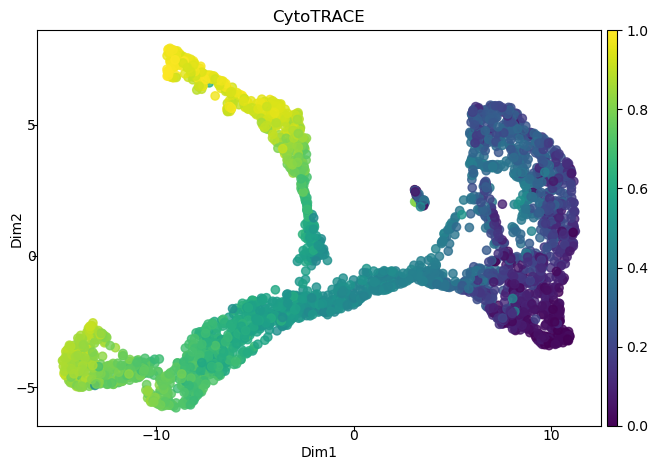

In [9]:
st.plot_dimension_reduction(adata,color=['CytoTRACE'],
                            n_components=2,show_graph=False,show_text=False,)

In [10]:


st.seed_elastic_principal_graph(adata,n_clusters=4,)



Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 4
Calculatng minimum spanning tree...
Number of initial branches: 3


In [11]:
adata

AnnData object with n_obs × n_vars = 3217 × 16934
    obs: 'bcs', 'metadata', 'leiden', 'CytoTRACE', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'root_cells', 'end_points', 'latent_time', 'kmeans', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S2_pseudotime', 'S1_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p', 'workdir', 'epg', 'flat_tree', 'seed_epg', 'seed_flat_tree', 'params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap', 'top_pcs', 'X_dr'

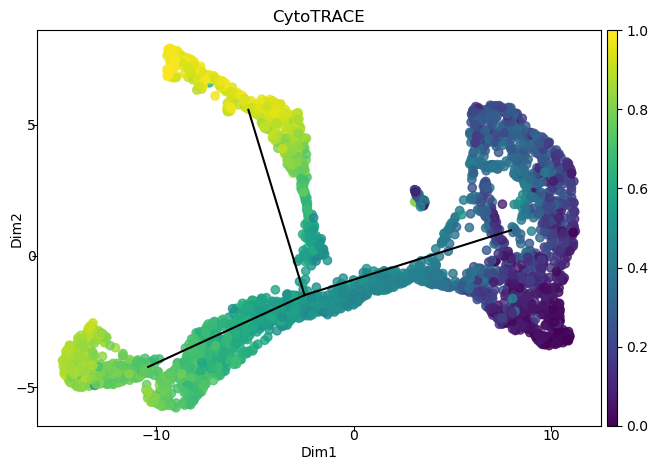

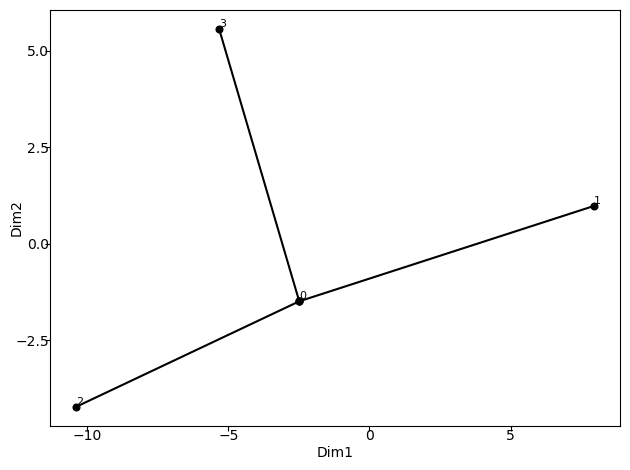

In [12]:


st.plot_dimension_reduction(adata,color=['CytoTRACE'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)



In [13]:
st.elastic_principal_graph(adata)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 3217 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
4
 
5
 
6
 
7
 
8
 
9
 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||50
	
1.591
	
50
	
49
	
44
	
2
	
0
	
0
	
0.7193
	
0.6608
	
0.9904
	
0.9912
	
0.7944
	
0.07738
	
3.869
	
193.5
	
0


23.172 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


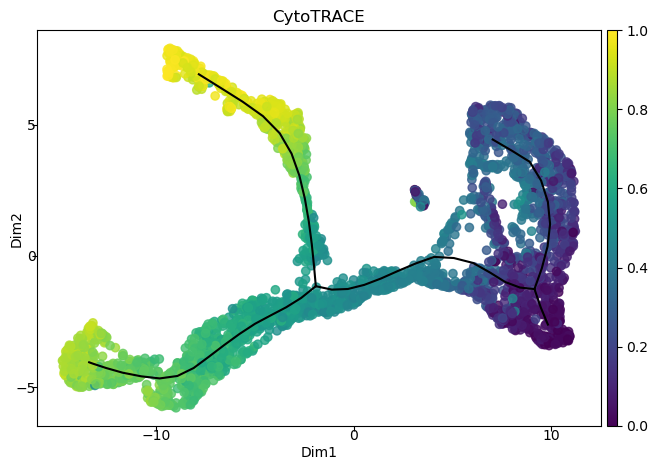

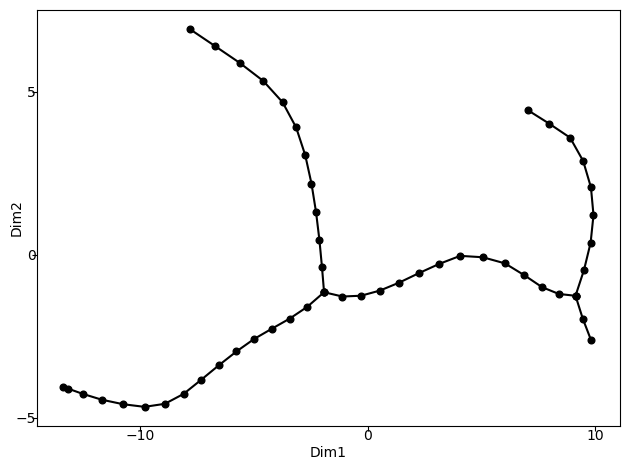

In [14]:

st.plot_dimension_reduction(adata,color=['CytoTRACE'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)



In [36]:
adata.obs.leiden=adata.obs.leiden.cat.as_ordered() 

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = "tight"
st.plot_dimension_reduction(adata,color=['CytoTRACE'],alpha=0.1,n_components=2,show_graph=True,
                            show_text=True,fig_size=(4,4),save_fig=True,)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


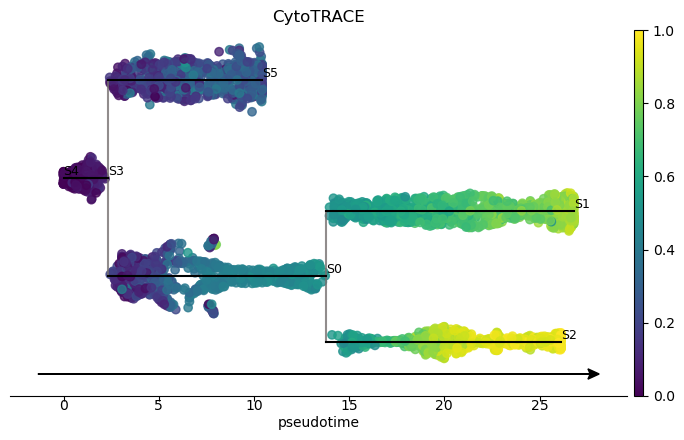

In [16]:
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_stream_sc(adata,root='S4',color=['CytoTRACE'],
                  dist_scale=0.3,show_graph=True,show_text=True)

In [17]:
adata.X=adata.X.A

In [18]:
import time
start = time.time()    
st.detect_leaf_markers(adata,marker_list=adata.var_names.tolist(),cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S4',n_jobs=40)
end = time.time()

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...


/home/lfaure/miniconda3/envs/stream/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


40 cpus are being used ...
15663 markers are being scanned ...


/home/lfaure/miniconda3/envs/stream/lib/python3.7/site-packages/stream/core.py:3870: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_marker_detection['bfs_edges'] = df_marker_detection['branch_id']
/home/lfaure/miniconda3/envs/stream/lib/python3.7/site-packages/stream/scikit_posthocs.py:169: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_grouped = np.array([x_flat[j:j + x_lens[i]] for i, j in enumerate(x_lens_cumsum)])
/home/lfaure/miniconda3/envs/stream/lib/python3.7/site-packages/stream/scikit_posthocs.py:185: VisibleDeprecationWarnin

In [19]:
print(end-start)

3413.725121974945


In [20]:
np.savetxt("STREAM_duration.txt",[end-start])

In [21]:
adata

AnnData object with n_obs × n_vars = 3217 × 16934
    obs: 'bcs', 'metadata', 'leiden', 'CytoTRACE', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'root_cells', 'end_points', 'latent_time', 'kmeans', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S2_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S1_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p', 'workdir', 'epg', 'flat_tree', 'seed_epg', 'seed_flat_tree', 'params', 'ori_epg', 'epg_obj', 'ori_epg_obj', 'stream_S4', 'scaled_marker_expr', 'leaf_markers_all', 'leaf_markers'
    obsm: 'X_pca', 'X_umap', 'velocity_umap', 'top_pcs', 'X_dr', 'X_stream_S4'

In [23]:
adata.uns['leaf_markers_all'].to_csv("STREAM_signi.csv")